# Plot memory-profiler results in a more clear way

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mem_df = pd.read_csv("test_files/HUVEC_memprof.dat")
mem_df = mem_df[mem_df.columns.tolist()[0]].str.split(" ", expand=True)

In [3]:
is_func = mem_df[0] != "MEM"
fun_df = mem_df[is_func].copy()
pts_df = mem_df[~is_func].copy()

In [4]:
pts_df.rename(columns={1: "memory", 2:"time"}, inplace=True)
pts_df = pts_df[["memory", "time"]]

In [5]:
pts_df["memory"] = pd.to_numeric(pts_df["memory"])
pts_df["time"] = pd.to_numeric(pts_df["time"])

In [6]:
start_time = pts_df["time"][0]
start_time

1684485233.5791

In [7]:
pts_df["time"] = pts_df["time"]-start_time
pts_df

,memory,time
0,0.601562,0.0000
1,15.398438,0.1005
2,20.746094,0.2010
3,25.296875,0.3015
4,29.761719,0.4021
...,...,...
38810,1516.542969,3908.2074
38811,1202.453125,3908.3079
38812,1209.753906,3908.4085
38813,1216.273438,3908.5091


In [8]:
fun_df.rename(columns={2: "start_mem", 4: "stop_mem", 5: "time"}, inplace=True)
fun_df = fun_df[["start_mem", "stop_mem", "time"]]

In [9]:
fun_df["start_mem"] = pd.to_numeric(fun_df["start_mem"])
fun_df["stop_mem"] = pd.to_numeric(fun_df["stop_mem"])
fun_df["time"] = pd.to_numeric(fun_df["time"])
fun_df["time"] = fun_df["time"]-start_time
fun_df

,start_mem,stop_mem,time
38760,141.7461,3255.3711,337.1992
38761,3255.3711,3910.1602,814.7618
38762,3910.1602,3400.7734,1151.6198
38763,3400.7734,3353.6172,1395.9835
38764,3353.6172,3328.3594,1631.3277
38765,3328.3594,3392.4766,1844.4938
38766,3392.4766,3194.5664,2046.1039
38767,3194.5664,3185.4141,2234.4131
38768,3185.4141,2838.1758,2368.3788
38769,2838.1758,3149.9805,2542.9941


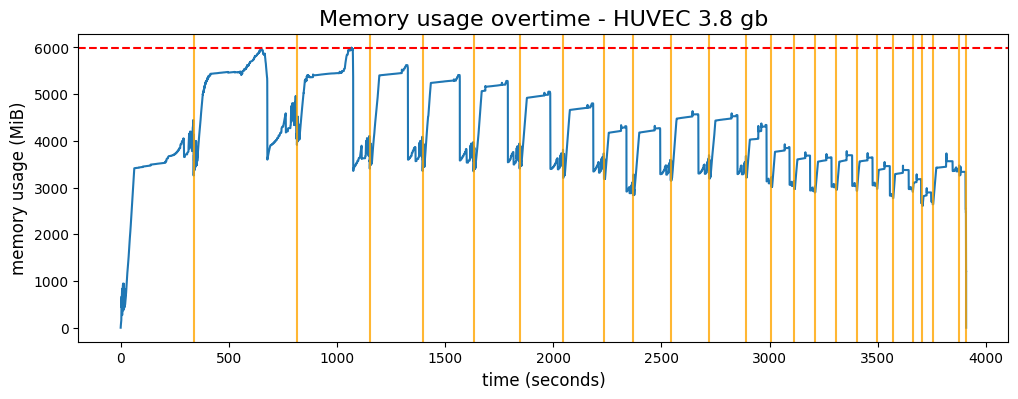

In [30]:
plt.figure(figsize=(12,4))
ax = sns.lineplot(data=pts_df, x="time", y="memory")
plt.title("Memory usage overtime - HUVEC 3.8 gb", fontsize=16)
ax.set_ylabel("memory usage (MiB)", fontsize=12)
ax.set_xlabel("time (seconds)",fontsize=12)
for tp in fun_df["time"].tolist():
    ax.axvline(tp, color="orange", alpha=0.8)
ax.axhline(max(pts_df["memory"].tolist()), color="red", linestyle="--")
plt.savefig("plots/profiling/memory_usage_HUVEC.png", dpi=600, bbox_inches='tight')